In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open("emissionMatrix.txt",'r') as f:
    emissionF = f.readlines()
with open("initialStateDistribution.txt",'r') as f:
    initStateF = f.readlines()
with open("observations.txt",'r') as f:
    obsvF = f.readlines()
with open("transitionMatrix.txt",'r') as f:
    transF = f.readlines()


In [3]:
bM = np.zeros((27,2))
for index,line in enumerate(emissionF):
    item0,item1 = line.strip().split("\t")
    bM[index][0] = float(item0)
    bM[index][1] = float(item1)

pi = np.zeros((27,))
for index,line in enumerate(initStateF):
    pi[index] = float(line.strip())

obsvM = np.array([int (i) for i in obsvF[0].strip().split(" ")])

aM = np.zeros((27,27))
for index,line in enumerate(transF):
    items = line.strip().split(" ")
    for j,item in enumerate(items):
        aM[index][j] = float(item)


Start forwardrecursion...
Start backtracking...


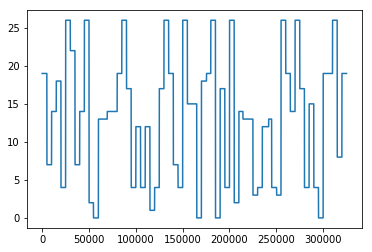

In [7]:
print("Start forwardrecursion...")
l = []
base = [0] * 27
for i in range(27):
    base[i] = np.log(pi[i]) + np.log(bM[i][obsvM[0]])
l.append(base)
T = obsvM.shape[0]
phi = []
for t in range(1,T):
    baseline = [0] * 27
    phiTmp   = [0] * 27
    for j in range(27):
        maxTmp = l[t-1][0] + np.log(aM[0,j])
        for i in range(1,27):
            if (l[t-1][i] + np.log(aM[i,j])) > maxTmp:
                maxTmp = l[t-1][i] + np.log(aM[i,j])
                phiTmp[j] = i
        baseline[j] = maxTmp + np.log(bM[j,obsvM[t]])
    phi.append(phiTmp)
    l.append(baseline)

print("Start backtracking...")
maxTmp = l[T-1][0]
index = 0
for i in range(1, 27):
    if l[T-1][i] > maxTmp:
        maxTmp = l[T-1][i]
        index = i

S = [index]
i = T-2
while (i >= 0):
    index = phi[i][index]
    S = [index] + S
    i -= 1
plt.plot(range(T),S)

In [32]:
message = chr(S[0]+65)
for index in range(1,T):
    if(S[index]!=S[index-1] and S[index]!=26):
        message += chr(S[index]+65)
    elif(S[index]!=S[index-1] and S[index]==26):
        message += ' '
print("The encoded hidden message is:",message)

The encoded hidden message is: THOSE WHO CANOT REMEMBER THE PAST ARE CONDEMNED TO REPEAT IT
